In [2]:
import os

print(os.getcwd())
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

/root/work


In [3]:
!ls /root/projects/PythonProjects/ip-dual-encoder-factorization-machine/data/input_processed/

ads-50k-events_processed.csv  ads-50k_processed.json


In [4]:
input_processed_path = '/root/projects/PythonProjects/ip-dual-encoder-factorization-machine/data/input_processed/'
df_events = pd.read_csv(input_processed_path + 'ads-50k-events_processed.csv')

In [5]:
df_ads = pd.read_json(input_processed_path + 'ads-50k_processed.json')
# df_ads = df_ads[[c for c in df_ads.columns if c not in ['content']]].rename(columns={'id': 'job_id'})
df_ads = df_ads.rename(columns={'id': 'job_id'})

# Merge directly

In [6]:
df_events['resume_id'] = df_events['resume_id'].astype(int)
df_events['job_id'] = df_events['job_id'].astype(int)
df_ads['job_id'] = df_ads['job_id'].astype(int)

df_merge = df_events.merge(df_ads, how='left', on='job_id')
df_merge

,event_datetime,resume_id,job_id,kind,title,abstract,content,location,classification,sub_classification,work_type
0,2021-05-01 08:42:05,158655,38820886,V,Pharmacist - Part Time - Melton,Expand your career with a leading pharmacy ret...,A career with endless opportunities is closer ...,Melbourne,Healthcare & Medical,Pharmacy,Part Time
1,2021-05-01 08:42:05,158655,38901970,V,Assistant Director - EL1,"Experienced EL 1 Assistant Director, Strategy ...",face2face reference number: 10600 3 Month ...,ACT,Government & Defence,Government - Federal,Contract/Temp
2,2021-05-01 08:42:05,158655,38919645,V,Property Manager - Luxury Portfolio,Higher Solution Specialists are currently seek...,Higher Solution Specialists is a privately-own...,Perth,Real Estate & Property,Residential Leasing & Property Management,Full Time
3,2021-05-01 08:42:05,158655,38928402,V,Looking for MC Drivers,MC Driver - there's more to them than meets th...,Are you ready to transform and roll out? Well ...,Sydney,"Manufacturing, Transport & Logistics",Road Transport,Contract/Temp
4,2021-05-01 08:42:05,158655,38847632,V,Executive Officer (ALTG & TACT) - Lung Foundat...,"Pivotal research program position, responsible...",About the Opportunity Lung Foundation Aust...,Melbourne,Healthcare & Medical,Management,Full Time
...,...,...,...,...,...,...,...,...,...,...,...
1153682,2021-05-01 22:29:00,11124,38933688,V,Corporate/M&A Lawyer,Advise Government and private enterprises; ene...,You Will be a mid-level Corporate/M A lawye...,Sydney,Legal,Corporate & Commercial Law,Full Time
1153683,2021-05-01 22:29:00,11124,38992991,V,Office and Accounts Administrator - Profession...,"Varied and challenging role, working with expe...",Our client is a highly successful building ind...,Auckland,Administration & Office Support,Administrative Assistants,Full Time
1153684,2021-05-01 22:29:00,11124,38821247,V,Gaming Supervisor,Gaming Supervisor,The Oakleigh Junction Hotel is currently seeki...,Melbourne,Hospitality & Tourism,Gaming,Casual/Vacation
1153685,2021-05-01 22:29:00,11124,38899420,V,Warehouse Manager - Windows/Doors,Warehouse Manager to join well known Glass and...,This facade contractor has been in the windows...,Sydney,"Manufacturing, Transport & Logistics",Management,Full Time


## Job seekers' location distribution

In [7]:
df_location_resume_id = df_merge[['resume_id', 'location']].drop_duplicates()
df_location_resume_id.loc[~df_location_resume_id['location'].isin(df_merge['location'].value_counts().head(5).index), 'location'] = 'Other locations'
df_location_resume_id = df_location_resume_id.drop_duplicates()
df_location_resume_id = df_location_resume_id.groupby('location').agg(len).reset_index()
df_location_resume_id

,location,resume_id
0,Auckland,16737
1,Brisbane,17703
2,Melbourne,19939
3,Other locations,20118
4,Perth,15960
5,Sydney,20040


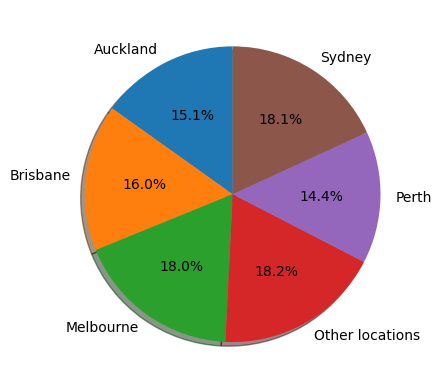

In [8]:
import matplotlib.pyplot as plt

plt.pie(df_location_resume_id['resume_id'], labels=df_location_resume_id['location'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

Users access (V/A) jobs in multiple locations. A typical user views jobs from 3 locations.
kind=V: 	 user_count=20159 	 mode(location_count)=8
kind=A: 	 user_count=3214 	 mode(location_count)=8


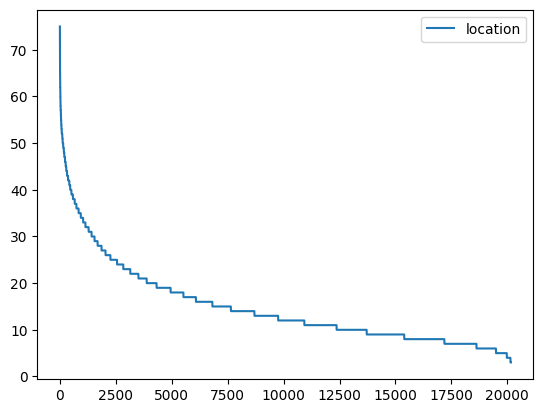

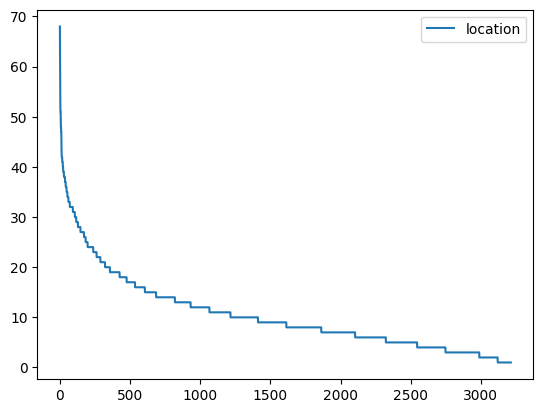

In [12]:
print('Users access (V/A) jobs in multiple locations. A typical user views jobs from 3 locations.')

for kind in ['V', 'A']:
    df_resume_id_location = df_merge.loc[df_merge['kind'] == kind, ['resume_id', 'location']].groupby('resume_id').agg(lambda x: x.nunique()).sort_values('location', ascending=False)
    # display(df_resume_id_location)

    print(f'kind={kind}: \t user_count={len(df_resume_id_location.index)} \t mode(location_count)={df_resume_id_location["location"].mode()[0]}')
    df_resume_id_location.reset_index(drop=True).plot.line()
    plt.plot()

## Jobs' location distribution

In [13]:
df_location_job_id = df_merge[['job_id', 'location']].drop_duplicates()
df_location_job_id.loc[~df_location_job_id['location'].isin(df_merge['location'].value_counts().head(5).index), 'location'] = 'Other locations'
df_location_job_id = df_location_job_id.drop_duplicates()
df_location_job_id = df_location_job_id.groupby('location').agg(len).reset_index()
df_location_job_id

,location,job_id
0,Auckland,3323
1,Brisbane,4155
2,Melbourne,10262
3,Other locations,14862
4,Perth,2848
5,Sydney,12757


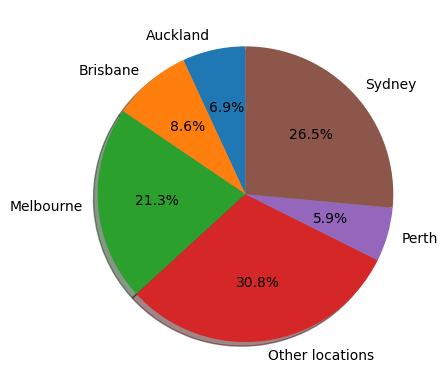

In [14]:
plt.pie(df_location_job_id['job_id'], labels=df_location_resume_id['location'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## `resume_id` vs. `classification`: how diverse users' job interests are

In [15]:
df_merge[['resume_id', 'classification']].drop_duplicates()

,resume_id,classification
0,158655,Healthcare & Medical
1,158655,Government & Defence
2,158655,Real Estate & Property
3,158655,"Manufacturing, Transport & Logistics"
7,158655,Education & Training
...,...,...
1153645,11124,Science & Technology
1153659,11124,Legal
1153662,11124,Engineering
1153665,11124,Human Resources & Recruitment


,classification
resume_id,
5995,30
39892,30
1197,30
9791,30
1761,30
...,...
213844,5
358230,5
67034,5


People often interact with diverse job categories.Some people are generalists; some people are specialists.  
Meantime, note that the same kind of jobs may be put under different classes. For example, "data scientist" jobs are classified as "Information & Communication Technology" and sometimes also as "Science & Technology" or "Engineering".


[]

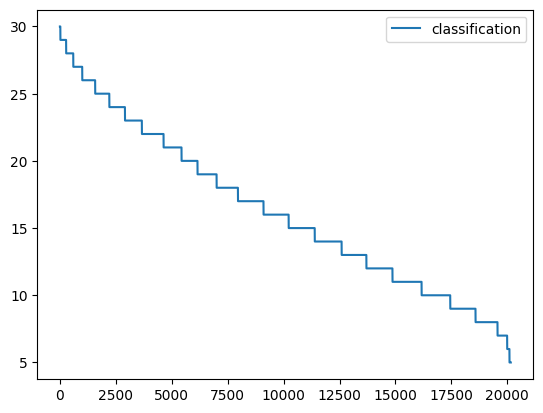

In [16]:
df_resume_id_classification = df_merge[['resume_id', 'classification']].groupby('resume_id').agg(lambda x: len(set(x))).sort_values('classification', ascending=False)
display(df_resume_id_classification)

print(
    'People often interact with diverse job categories.Some people are generalists; some people are specialists.  \nMeantime, note that the same kind of jobs may be put under different classes. For example, "data scientist" jobs are classified as "Information & Communication Technology" and sometimes also as "Science & Technology" or "Engineering".')
df_resume_id_classification.reset_index(drop=True).plot.line()
plt.plot()

Example: A user that accessed most diverse jobs

In [17]:
df_merge[df_merge['resume_id'] == 5995].sort_values('classification')

,event_datetime,resume_id,job_id,kind,title,abstract,content,location,classification,sub_classification,work_type
68907,2021-05-01 07:23:34,5995,38854275,V,Accounts Receivable Officer,Brilliant opportunity for an immediately avail...,Accounts Receivable Officer $30-35 Per Hour...,Sydney,Accounting,Accounts Receivable/Credit Control,Contract/Temp
69056,2021-05-01 07:21:58,5995,38834958,V,Accounts Payable Clerk - Television,A leading Television company is seeking an Acc...,A leading Television company is seeking an Acc...,Sydney,Accounting,Accounts Payable,Full Time
69055,2021-05-01 07:21:58,5995,38991905,V,Tax Accountant,Salary negotiable - Chinese Mandarin Speaker,Duties/The Role: - Preparation of Financial...,Sydney,Accounting,Taxation,Full Time
69101,2021-05-01 07:22:59,5995,38866498,V,Group Accounting & Treasury Director - Brisbane,"Reporting to our Group CFO, the Group Treasury...","Reporting to our Group CFO, the Group Treasury...",Brisbane,Accounting,Treasury,Full Time
68730,2021-05-01 07:21:35,5995,38896915,V,Accounts Receivable Officer,Great opportunity for a motivated & dynamic Ac...,"Job security in a permanent role | $65,000 +...",Melbourne,Accounting,Accounts Receivable/Credit Control,Full Time
...,...,...,...,...,...,...,...,...,...,...,...
69030,2021-05-01 07:21:58,5995,38924075,V,Carpenter,Residential & Commercial Chippies required for...,Tradestaff Tauranga are looking for great carp...,Bay of Plenty,Trades & Services,Carpentry & Cabinet Making,Contract/Temp
68827,2021-05-01 07:22:52,5995,38827717,V,Commercial Cleaner,We are currently recruiting for ongoing work c...,About the business Strike Force Services...,Toowoomba & Darling Downs,Trades & Services,Cleaning Services,Casual/Vacation
69011,2021-05-01 07:25:08,5995,38972105,V,Electronics Field Technician,"Due to our growing customer base, the MAF Ocea...",With over 50 years experience in agriculture a...,"Bendigo, Goldfields & Macedon Ranges",Trades & Services,Technicians,Full Time
69075,2021-05-01 07:21:58,5995,38964239,V,Hydraulic Service Technician - Richlands Opera...,We are currently seeking applicants for the ro...,Excellent above award remuneration Comfortab...,Brisbane,Trades & Services,Technicians,Full Time


## `resume_id` vs. `work_type`

kind=V: 	 user_count=20159 	 mode=4


,work_type_count,count
0,4,13823
1,3,5007
2,2,1259
3,1,70


[]

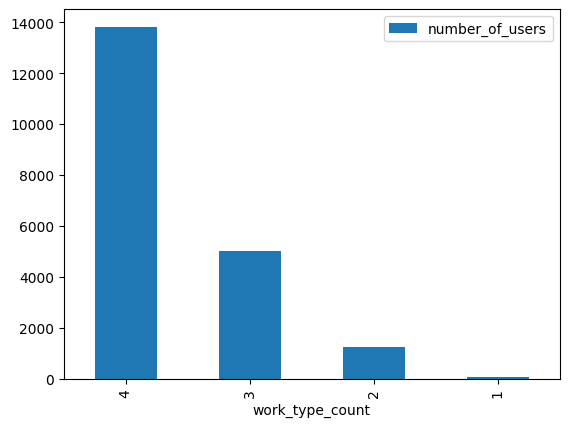

In [21]:
# print('`event_platform` can be discarded because most users use only 1 platform, thus as a feature it is not discriminative.')

df_resumeId_workTypeCount = df_merge.loc[df_merge['kind'] == 'V', ['resume_id', 'work_type']].groupby('resume_id').agg(lambda x: x.nunique()).reset_index(drop=False).rename(columns={'work_type': 'work_type_count'}).sort_values(
    'work_type_count', ascending=False)

print(f'kind=V: \t user_count={len(df_resumeId_workTypeCount.index)} \t mode={df_resumeId_workTypeCount["work_type_count"].mode()[0]}')

display(df_resumeId_workTypeCount['work_type_count'].value_counts().reset_index())
df_resumeId_workTypeCount['work_type_count'].value_counts().reset_index().rename(columns={'count': 'number_of_users'}).set_index('work_type_count').plot.bar()
plt.plot()

## Analysis of job click/application sequences of users
`resume_id` vs. `title`


In [22]:
df_merge = df_merge.sort_values('event_datetime', ascending=True)

In [23]:
import re
# Removing special characters-----------------------
regex = re.compile(r"[^a-zA-Z0-9\s.,!?""]")
# df_merge[['resume_id', 'job_id', 'kind', 'title']]
df_merge['title_cleaned'] = df_merge['title']
df_merge['title_cleaned'] = df_merge['title_cleaned'].apply(lambda x: regex.sub(', ', x)) # Removing special characters
df_merge['title_cleaned'] = df_merge['title_cleaned'].apply(lambda x: re.sub("\s{2,}", " ", x)) # Reducing spaces
df_merge['title_cleaned'] = df_merge['title_cleaned'].str.lower()
df_merge['title_cleaned'] = df_merge['title_cleaned'].apply(lambda x: re.findall(r"[a-zA-Z1-9.\s]*", x)[0].strip())

df_merge[['event_datetime', 'resume_id', 'job_id', 'kind', 'title', 'title_cleaned']]

,event_datetime,resume_id,job_id,kind,title,title_cleaned
324715,2021-05-01 00:00:00,56,38894993,V,Surveyor - Traineeship,surveyor
324718,2021-05-01 00:00:00,56,38927137,V,Project & Contracts Administrator | Civil Infr...,project
324719,2021-05-01 00:00:00,56,38930003,V,Membership Consultant,membership consultant
324720,2021-05-01 00:00:00,56,38846637,V,Lifeguards and Senior Lifeguards - Hamilton Pools,lifeguards and senior lifeguards
324721,2021-05-01 00:00:00,56,38914507,V,ADF Gap Year Air Force Warehouse Storeperson,adf gap year air force warehouse storeperson
...,...,...,...,...,...,...
636819,2021-05-01 23:58:54,279295,38973409,V,NDIS Support Worker,ndis support worker
636820,2021-05-01 23:58:54,279295,38962301,V,Full Time Dentist,full time dentist
636821,2021-05-01 23:58:54,279295,38992790,V,Veterinary Operations Manager - PETstock VET S...,veterinary operations manager
636802,2021-05-01 23:58:54,279295,38836303,V,PERMANENT Freight Sorters x 20,permanent freight sorters x 2


In [24]:
df_titles = df_merge['title_cleaned'].value_counts()
df_titles

title_cleaned
project manager                       10543
business development manager           8491
registered nurse                       8303
business analyst                       5439
receptionist                           4975
                                      ...  
crane truck vehicle driver                1
graduate helpdesk software support        1
receptionist part time                    1
senior linux                              1
underground heavy vehicle fitters         1
Name: count, Length: 20083, dtype: int64

Collect the directed edges of the graph (job pairs) of all users

In [25]:
kind_tmp = 'V'

In [19]:
df_user_title_events = df_merge.loc[df_merge['kind']==kind_tmp, ['event_datetime', 'resume_id', 'title_cleaned']].copy()

def convert_events_to_job_pairs(df_user_title_events_):
    df_job_seq_pairs = df_user_title_events_.assign(title_cleaned_next=df_user_title_events_.groupby('resume_id')['title_cleaned'].shift(-1)).dropna(subset='title_cleaned_next').reset_index(drop=True)
    _df_graph_edges = df_job_seq_pairs[['title_cleaned', 'title_cleaned_next']].value_counts().reset_index().rename(columns={0: 'weight'})
    return _df_graph_edges

In [20]:
df_graph_edges = convert_events_to_job_pairs(df_user_title_events)
df_graph_edges

,title_cleaned,title_cleaned_next,weight
0,business development manager,business development manager,127
1,accounts payable officer,registered nurse,100
2,project manager,project manager,99
3,registered nurse,accounts payable officer,98
4,chef required,qa associate,97
...,...,...,...
383180,maintenance electrician supervisor,commercial analyst,1
383181,maintenance electrician supervisor,fire protection supervisor,1
383182,maintenance electrician supervisor,graphic designer,1
383183,maintenance electrician supervisor,multimedia developer,1


Frequencies of repeated job pairs (kind=V):


<AxesSubplot:>

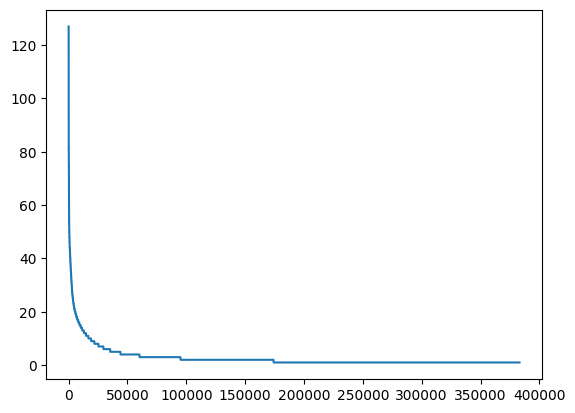

In [21]:
print(f'Frequencies of repeated job pairs (kind={kind_tmp}):')
df_graph_edges['weight'].plot.line()

Sample some users to observe their job click sequences

In [22]:
n_users_tmp = 5

sampled_users = np.random.choice(df_merge['resume_id'].unique(), size=n_users_tmp, replace=False)
print(sampled_users.size)

df_graph_edges_sampled = convert_events_to_job_pairs(df_user_title_events[df_user_title_events['resume_id'].isin(sampled_users)])

5


Visualise job event sequences of the sampled users as a network

In [23]:
import networkx as nx
from pyvis.network import Network

net = Network(height='1200px', width='100%', directed=True, heading=f'Job Event({kind_tmp}) Sequences: {n_users_tmp} users')
#Create directed graph object
g = nx.from_pandas_edgelist(df_graph_edges_sampled,
                            source='title_cleaned',
                            target='title_cleaned_next',
                            edge_attr='weight',
                            create_using=nx.DiGraph())

net.from_nx(g)

os.chdir('/root/projects/PythonProjects/ip-dual-encoder-factorization-machine/notebooks/step1_EDA/network_vis/')
net.save_graph(f"job_sequence_{kind_tmp}_for_{n_users_tmp}_users.html")

Very often people have very diverse job interests (w.r.t. View events). Many jobs in the same sequence often doesn't seem relevant to each other.

Visualise job event sequences of sampled 300 top job pairs as a network

In [24]:
top_n = 300
net = Network(height='1200px', width='100%', directed=True, heading=f'Job Event({kind_tmp}) Sequences: top sampled {top_n} pairs')
#Create directed graph object
g = nx.from_pandas_edgelist(df_graph_edges.head(1000).sample(top_n),
                            source='title_cleaned',
                            target='title_cleaned_next',
                            edge_attr='weight',
                            create_using=nx.DiGraph())

net.from_nx(g)

os.chdir('/root/projects/PythonProjects/ip-dual-encoder-factorization-machine/notebooks/step1_EDA/network_vis/')
net.save_graph(f"job_sequence_{kind_tmp}_for_top_sampled_{top_n}.html")

In [25]:
!ls /root/projects/PythonProjects/ip-dual-encoder-factorization-machine/notebooks/step1_EDA/network_vis/

job_sequence_A_for_5_users.html
job_sequence_A_for_top_sampled_300.html
job_sequence_V_for_3_users.html
job_sequence_V_for_5_users.html
job_sequence_V_for_top_sampled_300.html
lib


## Summary

In [26]:
print('Number of unique resume_id:', df_merge['resume_id'].nunique())
print('Number of unique job_id:', df_merge['job_id'].nunique())

Number of unique resume_id: 25072
Number of unique job_id: 49009
